In [1]:
import scipy as scp
import scipy.stats as sts
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
n = 100

In [3]:
N = 10000

In [4]:
frac = 0.05

In [5]:
def make_prob_calculator(n, N, frac, strict) :
    
    def unlucky(p) :
        observed_frac = int(N * (1 - frac))
        if strict : observed_sample = sts.binom(N, p).pmf(observed_frac)
        else : observed_sample = sts.binom(N, p).cdf(observed_frac)
        all_shows = p ** n
        return observed_sample * all_shows
    
    return unlucky

In [6]:
unlucky_strict = make_prob_calculator(n, N, frac, True)

In [7]:
unlucky_loose = make_prob_calculator(n, N, frac, False)

In [8]:
unlucky_strict(0.95)

0.00010835556399758063

In [9]:
unlucky_loose(0.95)

0.0029981952839784405

In [10]:
ps = scp.arange(0,1.00001,0.00001)

In [11]:
ys_strict = scp.apply_along_axis(unlucky_strict, 0, ps)

In [12]:
ys_loose = scp.apply_along_axis(unlucky_loose, 0, ps)

In [13]:
def make_plot(data, name, figsize = (12,6)) : 
    fig, axs = plt.subplots(1,2,sharey=True, figsize = (12,6))
    for i in range(0,2) :
        ax = axs[i] 
        ax.plot(data[i][0], data[i][1])
        ax.set_xlabel('p', fontsize = 'x-large')
    axs[0].set_ylabel('prob. of getting unlucky', fontsize = 'large')
    fig.savefig(name)
    return

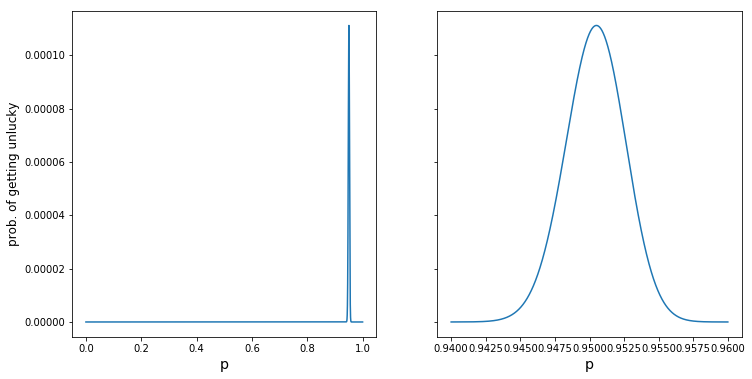

In [14]:
make_plot([(ps,ys_strict),(ps[94000:96000], ys_strict[94000:96000])], 'fig1.jpg')

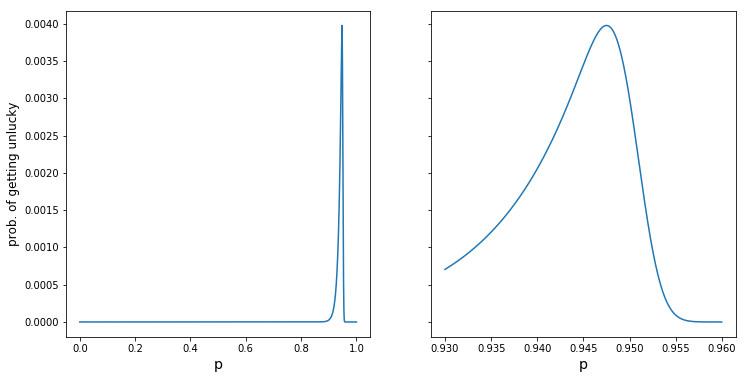

In [15]:
make_plot([(ps,ys_loose),(ps[93000:96000], ys_loose[93000:96000])], 'fig2.jpg')

In [16]:
scp.amax(ys_strict)

0.00011122470867018173

In [17]:
scp.amax(ys_loose)

0.0039758789930712237

In [18]:
scp.argmax(ys_strict)/100000

0.95050000000000001

In [19]:
scp.argmax(ys_loose)/100000

0.94750000000000001